In [21]:
from roboflow import Roboflow
import json

rf = Roboflow(api_key="UoWD7ey021Y4ZebxKrBu")
project = rf.workspace().project("weeds-nxe1w")
model = project.version(1).model

# project = rf.workspace().project("weed-detection-535r5")
# model = project.version(2).model

my_image = './assets/32179_jpg.rf.9b7e752dea7e074755ddcab02e1778be.jpg'

# infer on a local image
predictions = model.predict(my_image, confidence=50)

print(json.dumps(predictions.json(), indent=4))

loading Roboflow workspace...
loading Roboflow project...
{
    "predictions": [
        {
            "x": 1135,
            "y": 552,
            "width": 110,
            "height": 83,
            "confidence": 0.7542861104011536,
            "class": "Weeds",
            "class_id": 0,
            "image_path": "./assets/32179_jpg.rf.9b7e752dea7e074755ddcab02e1778be.jpg",
            "prediction_type": "ObjectDetectionModel"
        },
        {
            "x": 1103,
            "y": 23,
            "width": 58,
            "height": 32,
            "confidence": 0.751011848449707,
            "class": "Weeds",
            "class_id": 0,
            "image_path": "./assets/32179_jpg.rf.9b7e752dea7e074755ddcab02e1778be.jpg",
            "prediction_type": "ObjectDetectionModel"
        },
        {
            "x": 236,
            "y": 63,
            "width": 320,
            "height": 126,
            "confidence": 0.7041894197463989,
            "class": "Weeds",
            "c

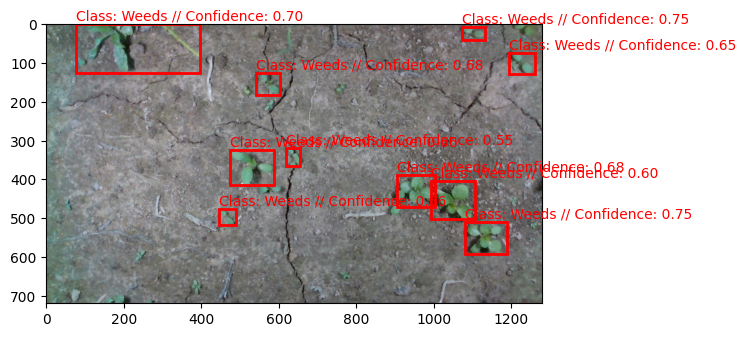

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 이미지 파일을 표시합니다.
image = plt.imread(my_image)
plt.imshow(image)

# 예측 정보를 가져옵니다.
predictions_json = predictions.json()['predictions']

# 예측 영역을 이미지에 그립니다.
for prediction in predictions:
    x_center = prediction['x'] 
    y_center = prediction['y'] 
    width = prediction['width']
    height = prediction['height']
    class_name = prediction['class']
    confidence = prediction['confidence']

    # 바운딩 박스 그리기
    plt.gca().add_patch(patches.Rectangle((x_center - width / 2, y_center - height / 2), width, height, linewidth=2, edgecolor='r', facecolor='none'))

    # 클래스와 신뢰도 표시
    plt.text(x_center - width / 2, y_center - height / 2 - 10, f"Class: {class_name} // Confidence: {confidence:.2f}", color='r')
plt.show()
